# Installing packages and improting libraries

In [5]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install imbalanced-learn

In [6]:
#Importing my libraries
from category_encoders import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve,roc_auc_score
import numpy as np
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
%cd /content/gdrive/MyDrive/Bloom Project

/content/gdrive/MyDrive/Bloom Project


In [9]:
!ls

HepatitisCdata.csv


# Reading in my csv

In [10]:
#Read in my csv
df = pd.read_csv('HepatitisCdata.csv', index_col='Unnamed: 0')

In [11]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Data wrangling and EDA

In [12]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [13]:
#Convert my catergorical columns into 1's & 0's
df['Category'] = [1 if x == '1=Hepatitis' else 0 for x in df['Category']]
df['Category'].unique()

df['Sex'] = [0 if x == 'm' else 1 for x in df['Sex']]


#Filling in my NaN values
df = df.fillna(df.mean())

In [14]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [15]:
df['Category'].value_counts()

0    591
1     24
Name: Category, dtype: int64

In [16]:
df['Category'].value_counts(normalize=True)

0    0.960976
1    0.039024
Name: Category, dtype: float64

# Splitting my data

In [17]:
#Getting my X and y values
target = 'Category'
X = df.drop(columns=target)
y = df[target]

In [18]:
ros = SMOTE(random_state=42)

In [19]:
#Splitting my test values and making sure they are untouched by my oversampling
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Oversampling my X and y values
X_sm, y_sm = ros.fit_resample(X, y)

In [21]:
#Oversampling my train and val values so I van have an untouched test set
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, random_state=42, test_size=0.2)

In [22]:
y_train.tail(20)

130    0
663    1
871    1
99     0
372    0
87     0
458    1
330    0
214    0
466    0
121    0
614    1
20     0
700    1
71     0
106    0
270    0
860    1
435    0
102    0
Name: Category, dtype: int64

# Baseline Accuracy

In [23]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.5045871559633027


# Logestic Regression, Random Forest, and Randomized Search
# With accuracy scores

In [24]:
model_lr = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [25]:
print('Training Accuracy:', model_lr.score(X_train, y_train))
print('Validation Accuracy:', model_lr.score(X_val, y_val))

Training Accuracy: 0.927916120576671
Validation Accuracy: 0.9685863874345549


In [26]:
#Making and fitting my RandomForest
model_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=25)
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=25, n_jobs=-1,
                                        random_state=42))])

In [27]:
#Checking my accuracy for my train and val sets
print('Training Accuracy:', model_rf.score(X_train, y_train))
print('Validation Accuracy:', model_rf.score(X_val, y_val))
print('Testing Accuracy:', model_rf.score(X_test, y_test))

Training Accuracy: 1.0
Validation Accuracy: 0.9842931937172775
Testing Accuracy: 0.975609756097561


In [28]:
#Making my param grid for my RandomizedSearch
param_grid = {
    'simpleimputer__strategy':['mean', 'median'],
    'randomforestclassifier__max_depth': range(4, 40, 5),
    'randomforestclassifier__n_estimators': range(25,125,25)
}

In [29]:
#Making and fitting my RandomizedSearch
model_rs = RandomizedSearchCV(
    model_rf,
    param_distributions = param_grid,
    cv = None,
    n_jobs = -1,
    verbose = -1,
    n_iter = 35
)

model_rs.fit(X_train, y_train)
train_acc = model_rs.best_score_
print('Accuracy Score:', train_acc)

Accuracy Score: 0.9803577571379429


In [30]:
model_rs.best_params_

{'randomforestclassifier__max_depth': 14,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

# Plotting my confustion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


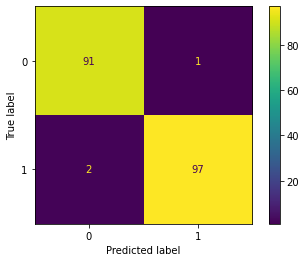

In [31]:
val_matrix = plot_confusion_matrix(
    model_rf,
    X_val,
    y_val,
    values_format='.0f'
)

In [32]:
print(classification_report(y_val,
                      model_rf.predict(X_val),
                      target_names = ['Hepatitis', 'No Hepatitis']))

              precision    recall  f1-score   support

   Hepatitis       0.98      0.99      0.98        92
No Hepatitis       0.99      0.98      0.98        99

    accuracy                           0.98       191
   macro avg       0.98      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


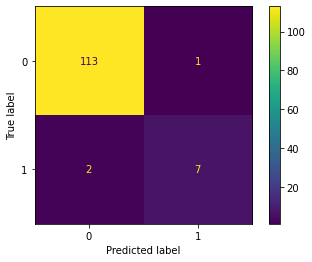

In [33]:
test_matrix = plot_confusion_matrix(
    model_rf,
    X_test,
    y_test,
    values_format='.0f'
)

In [34]:
print(classification_report(y_test,
                      model_rf.predict(X_test),
                      target_names = ['No Hepatitis', 'Hepatitis']))

              precision    recall  f1-score   support

No Hepatitis       0.98      0.99      0.99       114
   Hepatitis       0.88      0.78      0.82         9

    accuracy                           0.98       123
   macro avg       0.93      0.88      0.91       123
weighted avg       0.97      0.98      0.97       123



# Plotting my ROC curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


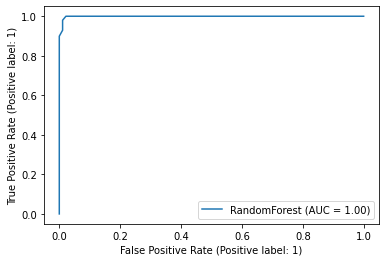

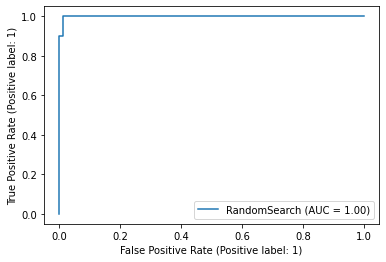

In [35]:
rf_curve = plot_roc_curve(model_rf,
                          X_val,
                          y_val,
                          name='RandomForest')
rs_curve = plot_roc_curve(model_rs,
                          X_val,
                          y_val,
                          name='RandomSearch')